### ESMA 3016
### Edgar Acuna
### Lab18: Distribucion de la Media Muestral y el Teorema del Limte Central (Liapunov, 1901)
### Octubre del 2020

In [20]:
from scipy.stats  import norm
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,factorial,pi
%matplotlib inline

In [21]:
#Poblacion
x=[3, 4, 6, 8, 10, 11, 12, 15, 20]

Calculando la media $\mu$ y la desviacion estandar $\sigma$ poblacionales

In [22]:
print('media=', np.mean(x), 'Desviacion Estandar=', np.std(x))

media= 9.88888888888889 Desviacion Estandar= 5.1086950811433995


In [23]:
#Simulando 50 muestras de tamano 30 de dicha poblacion
a=np.random.choice(x, 1500, replace=True)
b=a.reshape(50,30)
print(b)

[[12  3  3 ... 20  8 20]
 [ 6 10 11 ... 11 11 11]
 [20 20  3 ...  6  3 10]
 ...
 [11  8  6 ...  6 20  6]
 [10  6  8 ...  8  6 11]
 [ 3 15 11 ...  3  6  6]]


In [24]:
#Calculando las medias de la 50 muestras
medias1=b.mean(axis=1)
print(medias1)

[10.33333333 11.86666667 10.76666667 10.1        11.16666667 10.93333333
 10.66666667 11.26666667 11.26666667  9.3         8.53333333  9.9
 11.5         8.06666667  9.73333333  9.63333333 11.06666667 10.86666667
 10.36666667  8.8        11.3        10.3         8.83333333  9.43333333
  8.53333333 11.4        10.73333333 11.26666667 10.         10.4
  9.13333333 11.9         9.2        10.36666667 10.46666667  9.9
  8.93333333  9.93333333 10.         10.2        10.13333333 10.06666667
  9.66666667 11.06666667 10.1         9.3        10.43333333 10.03333333
 10.3         8.1       ]


In [25]:
#Calculando la media y estandar desviacion de las 50 medias
mean2=np.mean(medias1)
sd2=np.std(medias1,ddof=1)
print('media de las medias muestrals=', mean2,'desviacion estandar de la media muestral=',sd2)

media de las medias muestrals= 10.151333333333334 desviacion estandar de la media muestral= 0.9402853332560858


In [26]:
#Calculando sigma/sqrt(n)
np.std(x)/sqrt(30)

0.9327158451193083

Se puede notar que las medias de las medias muestrales es aprox igual a la media poblacional y que la desviacion estandar de las medias muestrales es aprox $\frac{\sigma}{\sqrt{n}}$

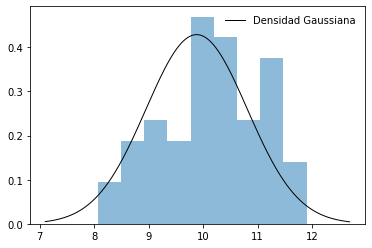

In [27]:
x=np.arange(7.1,12.7,.01)
fig, ax = plt.subplots(1, 1)
ax.hist(medias1,bins=9,density = True,alpha=.5)
ax.plot(x, norm.pdf(x,loc=9.88,scale=.93), 'k-', lw=1, label='Densidad Gaussiana')
ax.legend(loc='best', frameon=False)

Según reportes del centro nacional para estadísticas de salud, alrededor del 20 % de la población masculina adulta de los Estados Unidos es obesa.  Se elige al azar una muestra de 150 hombres adultos en los Estados Unidos. ¿Cuál es la probabilidad de que:

	a) Haya a lo más 25 personas obesas?
	b) Haya más de 22 pero menos de 35 obesos?
	c) Haya por lo menos un  25% de obesos en la muestra?

In [28]:
from scipy.stats  import binom
p1=binom.cdf(25,150,.20)

In [29]:
p1

0.1799257342392581

In [30]:
from math import sqrt
media=150*.2;
stdev=sqrt(150*.2*.8)

In [31]:
p1approx=norm.cdf(25.5,media,stdev)
p1approx

0.17916323337444012

In [32]:
p2=binom.cdf(34,150,.2)-binom.cdf(22,150,.2)
p2

0.7627679367830503

In [33]:
p2_approx=norm.cdf(34.5,media,stdev)-norm.cdf(22.5,media,stdev)
p2_approx

0.7579435543060898

In [34]:
p3=1-norm.cdf(.25,.20,sqrt(.2*.8/150))
p3

0.0628932123194701

In [35]:
norm.cdf(.35,.30,sqrt(.3*.7/350))-norm.cdf(.25,.30,sqrt(.3*.7/350))

0.9587731666628363